# # Daire - Dalgacik Donusumu
### Sekil 3.35

In [16]:
# coding: utf-8
# Graphing helper function
def setup_graph(title='', x_label='', y_label='', fig_size=None):
    fig = plt.figure()
    if fig_size != None:
        fig.set_size_inches(fig_size[0], fig_size[1])
    ax = fig.add_subplot(111)
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

def resize(a, new_shape, stretch=True,method='linear'):
    """ Returns a in the new_shape.
    stretch=True: Interpolate as necessary. If false, use numpy.resize
    method= 'linear' ==> interp2d kind.
    %Only supports 2D at the moment   
    """
    import numpy as np
    if stretch==False:
        return np.resize(a, new_shape)
    import scipy
    import scipy.interpolate
    x=np.arange(a.shape[0])
    y=np.arange(a.shape[1])
    interpFun=scipy.interpolate.interp2d(x,y,a )
    X=np.arange(new_shape[0])*a.shape[0]/new_shape[0]
    Y=np.arange(new_shape[1])*a.shape[1]/new_shape[1]
    return interpFun(X,Y)

def scalogram2(data, vmin=None, vmax=None, max_level=None, scale=None):
    """ scalogram2(data, vmin=None, vmax=None)
    Plots a 2D scalogram for wavelet transforms generated by
    pywt.wavedec2 using imshow.
    """

    if not max_level:
      max_level=len(data);

    approx=abs(data[0]);
    #P.matshow(approx);P.title('Preloop');
    for row in range(1,len(data)):
        #scale = 2.0 ** (row - len(data))
        #print row
        #print approx.shape
        #print data[row][0].shape
        if approx.shape[0]<> data[row][0].shape[0]:
            approx=resize(approx, data[row][0].shape);
            #print basic.resize
        arr=np.zeros([ data[row][0].shape[0]*2, data[row][0].shape[1]*2] )
        #print arr.shape
        #print approx.shape
        #P.matshow(approx);P.title(['Row', str(row)]);
        arr[0:approx.shape[0], 0:approx.shape[1]]=approx;
        arr[0:approx.shape[0], approx.shape[1]: ]=abs(data[row][0]);
        arr[approx.shape[0]: , 0:approx.shape[1]]=abs(data[row][1]);
        arr[approx.shape[0]: , approx.shape[1]: ]=abs(data[row][2]);
        approx=arr; #save for next loop.
        if row==max_level:
            break


    if not vmin:
        vmin = min(arr.ravel())
    if not vmax:
        vmax = max(arr.ravel())
    plt.figure();
    plt.gca().set_autoscale_on(False)
    if scale=='log':
        plt.imshow(
            10*np.log10(arr),
            interpolation = 'nearest',
            vmin = 10*np.log10(vmin),
            vmax = 10*np.log10(vmax),
            extent = [0, 1, 0, 1])
        plt.colorbar();
        plt.title('Logscale')
    elif scale=='sqrt':
        plt.imshow(
            np.sqrt(arr),
            interpolation = 'nearest',
            vmin = np.sqrt(vmin),
            vmax = np.sqrt(vmax),
            extent = [0, 1, 0, 1])
        plt.colorbar();
        plt.title('SQRT')
    else:
        plt.imshow(
            arr,
            interpolation = 'nearest',
            vmin = vmin,
            vmax = vmax,
            extent = [0, 1, 0, 1])
        plt.colorbar();
        plt.title('Linear scale')
    #Draw Dividers
    for r in xrange(1,max_level):
        scale = 2.0 ** (r - max_level)
        lim=2.*scale;
        #print scale
        plt.plot([scale, scale],[1-lim, 1], 'r', linewidth=4)
        plt.plot([0, lim],[1-scale, 1-scale], 'r', linewidth=4)
    return arr


### Once basit bir grafik hazirlayalim.
### Bir daire cizelim. 

In [17]:
get_ipython().magic('matplotlib inline')
import matplotlib.pyplot as plt
import numpy as np
import scipy.misc
import pywt
L=100
A=np.ones([L,L])
X,Y=np.meshgrid(np.r_[0:L], np.r_[0:L]);
ind=np.sqrt((X-50.)**2+(Y-50.)**2)<20
A[ind]=0;

### Simdi de dalgacik karsiligina bakalim

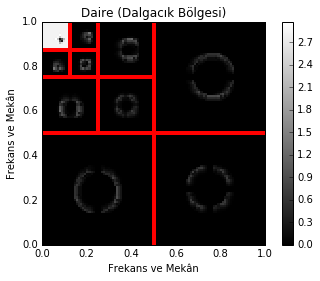

In [18]:
wavelet_type='db4';
w = pywt.Wavelet(wavelet_type)
# Gereken dekompozisyon seviyesi
dwt_max_level=pywt.dwt_max_level(L, w)

coeff = pywt.wavedec2(A, wavelet_type)

scalogram2(coeff, scale='sqrt');plt.gray()
plt.title(u'Daire (Dalgacık Bölgesi)');plt.xlabel(u'Frekans ve Mekân');plt.ylabel(u'Frekans ve Mekân')